Engineering Placement Prediction

In [ ]:
#mount the Google Drive files
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#importing libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import seaborn as sb
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn import preprocessing
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")

from scipy import stats
from scipy.stats import shapiro
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
#read files using pandas
df = pd.read_csv('/content/drive/MyDrive/collegePlace.csv')
df.head().style.background_gradient(axis=0)
data=df

In [ ]:
#checking if any null values 
pd.DataFrame(data.isnull().sum(), columns=["Null Values"]).rename_axis("Column Name")

,Null Values
Column Name,
Age,0
Gender,0
Stream,0
Internships,0
CGPA,0
Hostel,0
HistoryOfBacklogs,0
PlacedOrNot,0


In [ ]:
#finding no of rows and coulmns
print("Rows    :",df.shape[0])
print("Columns :",df.shape[1])

Rows    : 2966
Columns : 8


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                2966 non-null   int64 
 1   Gender             2966 non-null   object
 2   Stream             2966 non-null   object
 3   Internships        2966 non-null   int64 
 4   CGPA               2966 non-null   int64 
 5   Hostel             2966 non-null   int64 
 6   HistoryOfBacklogs  2966 non-null   int64 
 7   PlacedOrNot        2966 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 185.5+ KB


In [ ]:
df.describe().style.background_gradient(axis=0)

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
count,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000
mean,21.485840,0.703641,7.073837,0.269049,0.192178,0.552596
std,1.324933,0.740197,0.967748,0.443540,0.394079,0.497310
min,19.000000,0.000000,5.000000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,6.000000,0.000000,0.000000,0.000000
50%,21.000000,1.000000,7.000000,0.000000,0.000000,1.000000
75%,22.000000,1.000000,8.000000,1.000000,0.000000,1.000000
max,30.000000,3.000000,9.000000,1.000000,1.000000,1.000000


In [ ]:
df['Internships'].unique()

array([1, 0, 2, 3])

In [ ]:
df['Stream'].unique()

array(['Electronics And Communication', 'Computer Science',
       'Information Technology', 'Mechanical', 'Electrical', 'Civil'],
      dtype=object)

In [ ]:
df['Hostel'].unique()

array([1, 0])

In [ ]:
df['HistoryOfBacklogs'].unique()

array([1, 0])

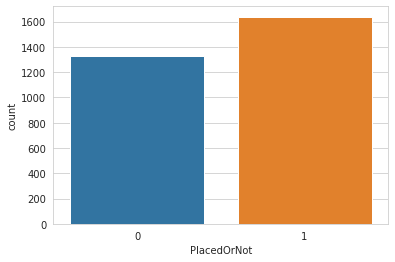

In [ ]:
sns.countplot(data = df , x = 'PlacedOrNot')

In [ ]:
print('Not Placed :', round(df['PlacedOrNot'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Placed :', round(df['PlacedOrNot'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

Not Placed : 44.74 % of the dataset
Placed : 55.26 % of the dataset


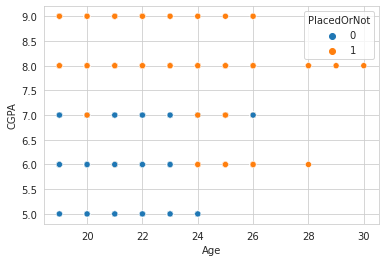

In [ ]:
sns.scatterplot(data = df, x='Age' , y ='CGPA' , hue='PlacedOrNot')

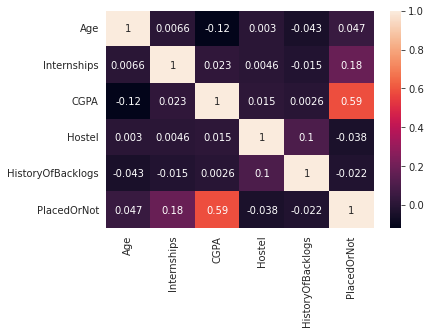

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
specs = [[{'type':'domain'}, {'type':'domain'}], [{'type':'domain'}, {'type':'domain'}]]
fig = make_subplots(rows=2, cols=2, specs=specs,subplot_titles=["Internships","CGPA","Hostel","HistoryOfBacklogs"])

Internships=df.groupby(["Internships"]).size()
CGPA=df.groupby(["CGPA"]).size()
Hostel=df.groupby(["Hostel"]).size()
HistoryOfBacklogs=df.groupby(["HistoryOfBacklogs"]).size()


fig.add_trace(go.Pie( values=Internships, name='Internships'), 1, 1)
fig.add_trace(go.Pie( values=CGPA, name='CGPA'), 1, 2)
fig.add_trace(go.Pie( values=Hostel, name='Hostel'), 2, 1)
fig.add_trace(go.Pie( values=HistoryOfBacklogs, name='HistoryOfBacklogs'), 2, 2)

fig.update_traces(hoverinfo='label+percent+name', textinfo='none')
fig.update(layout_title_text='Internships-CGPA-Hostel-HistoryOfBacklogs', layout_showlegend=False)

fig=go.Figure(fig)
fig.show()

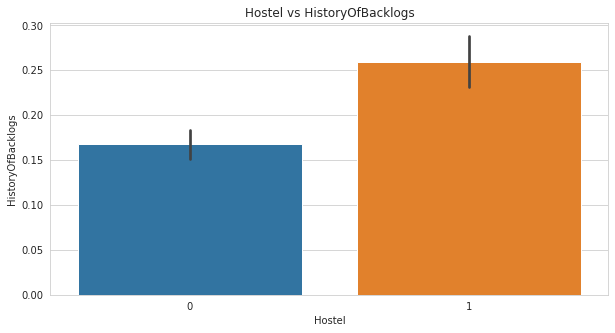

In [ ]:
plt.figure(figsize=(10,5))
plt.title("Hostel vs HistoryOfBacklogs")
sb.barplot(x="Hostel", y="HistoryOfBacklogs", data=df)
plt.show()

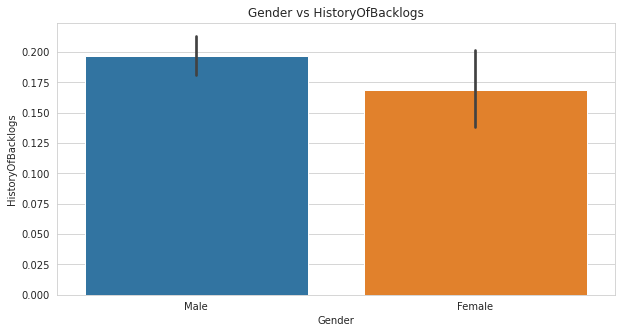

In [ ]:
plt.figure(figsize=(10,5))
plt.title("Gender vs HistoryOfBacklogs")
sb.barplot(x="Gender", y="HistoryOfBacklogs", data=df)
plt.show()

In [ ]:
import plotly.express as px

fig = px.histogram(df, "Stream", color = "PlacedOrNot",barmode = "group", 
                   title = "Placement according to Stream", 
                   template = "plotly_dark",width = 700)
fig.show()

In [ ]:
fig = px.pie(df, names = "Gender", title = "Proportion of male and female", 
             hole = 0.5, template = "plotly_dark",width=500)
fig.update_traces(textposition = "inside",textinfo = "percent+label",
                 marker = dict(line = dict(color = "#000000",width = 1.5)))
fig.show()

In [ ]:
baclog = dict(df["HistoryOfBacklogs"].groupby(df["Gender"]).sum())
print(baclog)
gendct = dict(df["Gender"].value_counts())
print(gendct)
bacavg = dict()
bacavg = dict()
gen ={}
for key, value in baclog.items():
    bacavg[key] = baclog[key]/gendct[key]
print(bacavg)
gen = ["Male","Female"]
baclog = [0.19676767676767676, 0.1690427698574338]
baconavg = pd.DataFrame({'Gender': gen, 'BacLogOnAvg': baclog})
print(baconavg)


{'Female': 83, 'Male': 487}
{'Male': 2475, 'Female': 491}
{'Female': 0.1690427698574338, 'Male': 0.19676767676767676}
   Gender  BacLogOnAvg
0    Male     0.196768
1  Female     0.169043


In [ ]:
fig = px.bar(baconavg,x = "Gender", y = "BacLogOnAvg",color = "Gender",
            title = "BackLog history on Average", width = 700,
            template = "plotly_dark")
fig.show()

In [ ]:
placed = dict(df['PlacedOrNot'].groupby(df["Internships"]).sum())
participants = dict(df['PlacedOrNot'].groupby(df["Internships"]).count()) 

placedonavg = dict()
for key, val in placed.items():
    placedonavg[key] = placed[key]/participants[key]
print(placedonavg)

{0: 0.49135987978963186, 1: 0.5364667747163695, 2: 0.8057142857142857, 3: 0.803921568627451}


In [ ]:
placement = dict()
for key, val in placedonavg.items():
    placement[key] = [val]
print(placement)
intern = list(placedonavg.keys())
PlacedAvg = list(placedonavg.values())
df_place = pd.DataFrame({"Internships": intern, "PlacementOnAvg": PlacedAvg})
print(df_place)

{0: [0.49135987978963186], 1: [0.5364667747163695], 2: [0.8057142857142857], 3: [0.803921568627451]}
   Internships  PlacementOnAvg
0            0        0.491360
1            1        0.536467
2            2        0.805714
3            3        0.803922


In [ ]:
fig = px.bar(df_place, x = "Internships", y = "PlacementOnAvg", color = "Internships", 
                   title = "Placement on Average according to Internships", 
                   template = "plotly_dark",width = 700)
fig.show()

In [ ]:
fig = px.histogram(df, "CGPA", color = "PlacedOrNot",barmode = "group", 
                   title = "Number of Placement according to CGPA", 
                   template = "plotly_dark",width = 700)
fig.show()

In [ ]:
df.rename(columns={'HistoryOfBacklogs': 'backlogs', 'PlacedOrNot': 'placed'}, inplace=True)

In [ ]:
df = df.rename(columns=str.lower)

In [ ]:
palette = {1:'#46C646', 0:'#FF0000'}

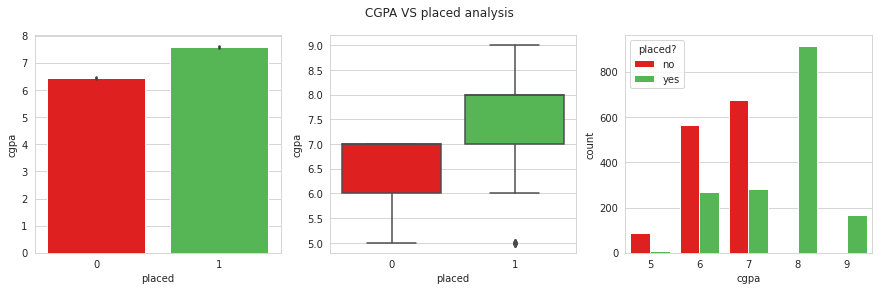

In [ ]:
#How does CGPA affect job placement?


fig, ax = plt.subplots(1,3, figsize=(15,4))
plt.suptitle('CGPA VS placed analysis')
sns.barplot(ax=ax[0], x='placed', y='cgpa', data=df, palette=palette)
sns.boxplot(ax=ax[1], x='placed', y='cgpa', data=df, palette=palette)
sns.countplot(ax=ax[2], x='cgpa', data=df, hue='placed', palette=palette)
plt.legend(title='placed?', loc='upper left', labels=['no', 'yes'])
plt.show()

#From these plots we can see that the average CGPA of placed students in higher than the CGPA of not placed students.
#In particular, from the boxplot we can see that there are some students with a low cgpa (cgpa=5) that still got placed.
#Who are these students?

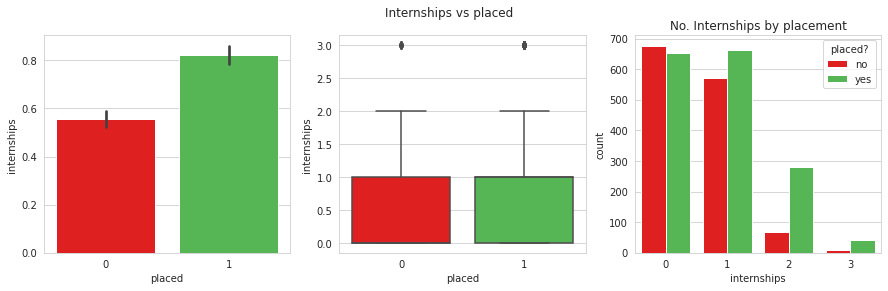

In [ ]:
#How do internship numbers affect job placement?

fig, ax = plt.subplots(1,3, figsize=(15,4))
plt.suptitle('Internships vs placed')
sns.barplot(ax=ax[0], x='placed', y='internships', data=df,palette=palette)
sns.boxplot(ax=ax[1], x='placed', y='internships', data=df,palette=palette)
sns.countplot(ax=ax[2], x='internships', data=df, hue='placed',palette=palette)
plt.legend(title='placed?', loc='upper right', labels=['no', 'yes'])
plt.title('No. Internships by placement')
plt.show()

# conclusion--We can see that students who had 2 ore more internships tends to be placed.

In [ ]:
df_int = df.loc[df['internships'] == 3]

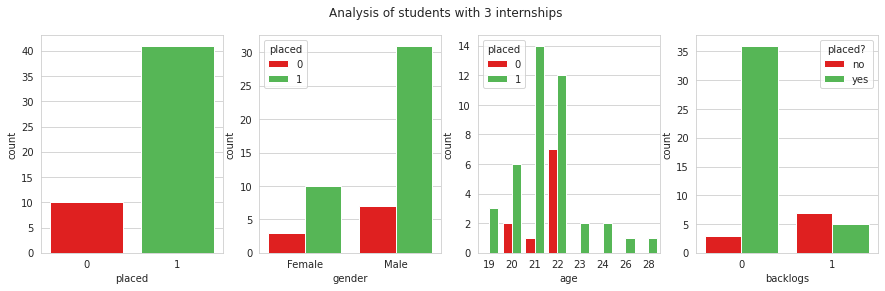

In [ ]:
#Analysis of students with many internships (3 internships)

fig, ax = plt.subplots(1,4, figsize=(15,4))
plt.suptitle('Analysis of students with 3 internships')
sns.countplot(ax=ax[0], x='placed', data=df_int,palette=palette)
sns.countplot(ax=ax[1], x='gender', hue='placed', data=df_int,palette=palette)
sns.countplot(ax=ax[2], x='age', data=df_int, hue='placed',palette=palette)
sns.countplot(ax=ax[3], x='backlogs', hue='placed', data=df_int,palette=palette)
plt.legend(title='placed?', loc='upper right', labels=['no', 'yes'])
plt.show()

In [ ]:
# Now we are going to divid the data to x and y : 
X = pd.get_dummies(df.drop('placed',axis=1),drop_first= True,prefix='Dummy',prefix_sep = '*')
y = df['placed']

In [ ]:
# Train test split 
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
# Now we are going to scale the data : 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
scaled_x_train = scaler.fit_transform(X_train)
scaled_x_test = scaler.transform(X_test)

LogisticRegression Algorithm 

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.metrics import classification_report , plot_confusion_matrix , accuracy_score

In [ ]:
log_model = LogisticRegression()
log_model.fit(scaled_x_train,y_train)

LogisticRegression()

In [ ]:
y_pred=log_model.predict(scaled_x_test)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import metrics

76.9857433808554
76.05633802816901
73.93258426966293


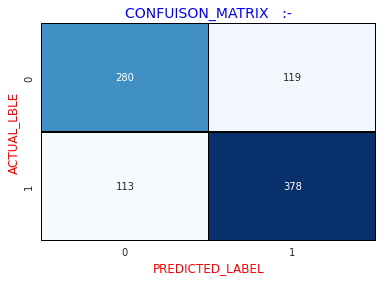

In [ ]:
print(metrics.precision_score(y_pred,y_test)*100)
print(metrics.recall_score(y_pred,y_test)*100)
print(metrics.accuracy_score(y_pred,y_test)*100)
sns.heatmap(metrics.confusion_matrix(y_test,y_pred),annot=True,cbar=False
            ,cmap="Blues",fmt="1",linecolor="Black",linewidth=0.3)
plt.xlabel("PREDICTED_LABEL",fontsize=12,color='r')
plt.ylabel("ACTUAL_LBLE",fontsize=12,color='r')
plt.title("CONFUISON_MATRIX   :-",fontsize=14,color="b")
plt.show()

***KNN_Algorithm******

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model = KNeighborsClassifier(n_neighbors=3)

# Train the model using the training sets
model.fit(scaled_x_train,y_train)

#Predict Output
knn_pred = model.predict(scaled_x_test)

78.61507128309573
86.35346756152126
81.34831460674158


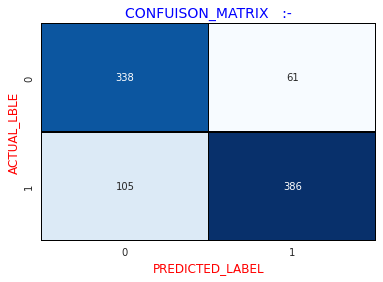

In [ ]:
print(metrics.precision_score(knn_pred,y_test)*100)
print(metrics.recall_score(knn_pred,y_test)*100)
print(metrics.accuracy_score(knn_pred,y_test)*100)
sns.heatmap(metrics.confusion_matrix(y_test,knn_pred),annot=True,cbar=False
            ,cmap="Blues",fmt="1",linecolor="Black",linewidth=0.3)
plt.xlabel("PREDICTED_LABEL",fontsize=12,color='r')
plt.ylabel("ACTUAL_LBLE",fontsize=12,color='r')
plt.title("CONFUISON_MATRIX   :-",fontsize=14,color="b")
plt.show()


<Figure size 432x288 with 0 Axes>

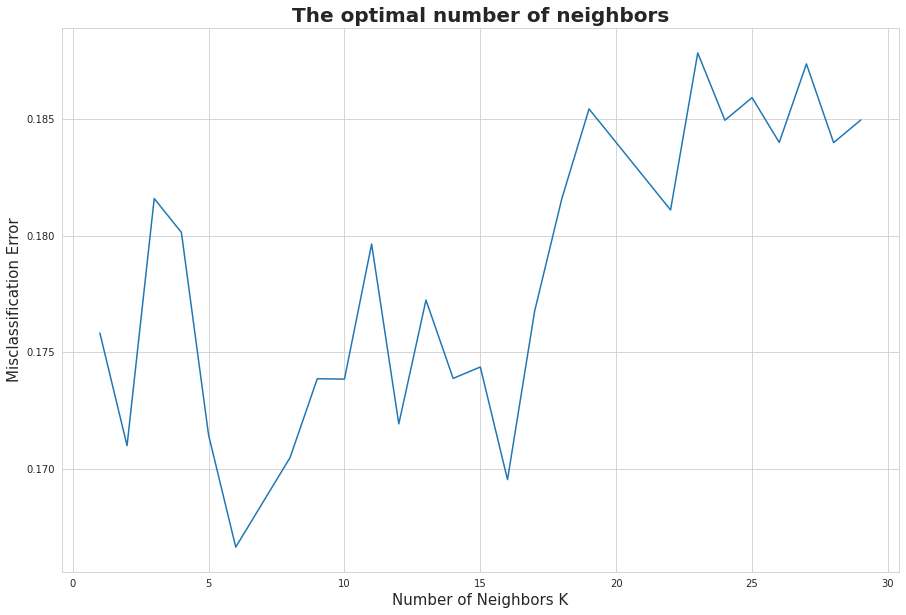

In [ ]:
from sklearn.model_selection import cross_val_score
k_list = list(range(1,30,1))
# creating list of cv scores
cv_scores = []

# perform 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, scaled_x_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)

plt.show()

In [ ]:
best_k = k_list[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d." % best_k)

The optimal number of neighbors is 6.


In [ ]:
knn_model = KNeighborsClassifier(n_neighbors= 6)
knn_model.fit(scaled_x_train,y_train)
knn_pred1 = knn_model.predict(scaled_x_test)

In [ ]:
print(metrics.accuracy_score(knn_pred1,y_test)*100)

82.02247191011236


**SVM ALGORITHM **

In [ ]:
from sklearn.svm import SVC

In [ ]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(scaled_x_train, y_train)

#Predict the response for test dataset
svm_pred = clf.predict(scaled_x_test)

75.35641547861506
79.74137931034483
75.84269662921348


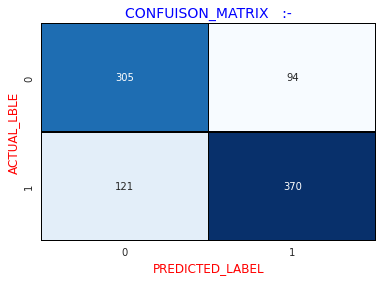

In [ ]:
print(metrics.precision_score(svm_pred,y_test)*100)
print(metrics.recall_score(svm_pred,y_test)*100)
print(metrics.accuracy_score(svm_pred,y_test)*100)
sns.heatmap(metrics.confusion_matrix(y_test,svm_pred),annot=True,cbar=False
            ,cmap="Blues",fmt="1",linecolor="Black",linewidth=0.3)
plt.xlabel("PREDICTED_LABEL",fontsize=12,color='r')
plt.ylabel("ACTUAL_LBLE",fontsize=12,color='r')
plt.title("CONFUISON_MATRIX   :-",fontsize=14,color="b")
plt.show()

**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
tree_model = DecisionTreeClassifier()

In [ ]:
tree_model.fit(scaled_x_train,y_train)
tree_pred=tree_model.predict(scaled_x_test)


83.09572301425662
94.88372093023256
88.20224719101124


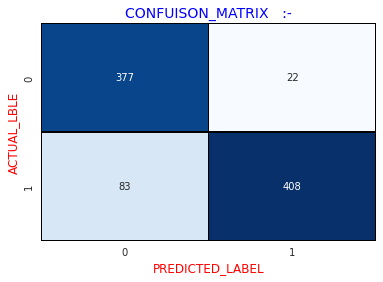

In [ ]:
print(metrics.precision_score(tree_pred,y_test)*100)
print(metrics.recall_score(tree_pred,y_test)*100)
print(metrics.accuracy_score(tree_pred,y_test)*100)
sns.heatmap(metrics.confusion_matrix(y_test,tree_pred),annot=True,cbar=False
            ,cmap="Blues",fmt="1",linecolor="Black",linewidth=0.3)
plt.xlabel("PREDICTED_LABEL",fontsize=12,color='r')
plt.ylabel("ACTUAL_LBLE",fontsize=12,color='r')
plt.title("CONFUISON_MATRIX   :-",fontsize=14,color="b")
plt.show()

In [ ]:
tree_model.feature_importances_

array([0.13750097, 0.08976734, 0.64705215, 0.01686228, 0.02985158,
       0.01209048, 0.00965412, 0.0207132 , 0.01381301, 0.01290786,
       0.00978701])

In [ ]:
X.columns

Index(['age', 'internships', 'cgpa', 'hostel', 'backlogs', 'Dummy*Male',
       'Dummy*Computer Science', 'Dummy*Electrical',
       'Dummy*Electronics And Communication', 'Dummy*Information Technology',
       'Dummy*Mechanical'],
      dtype='object')

In [ ]:
pd.DataFrame(index=X.columns,data = tree_model.feature_importances_,columns=['Feature Importance']).sort_values('Feature Importance')

,Feature Importance
Dummy*Computer Science,0.009654
Dummy*Mechanical,0.009787
Dummy*Male,0.012090
Dummy*Information Technology,0.012908
Dummy*Electronics And Communication,0.013813
hostel,0.016862
Dummy*Electrical,0.020713
backlogs,0.029852
internships,0.089767
age,0.137501


In [ ]:
 from sklearn.tree import plot_tree

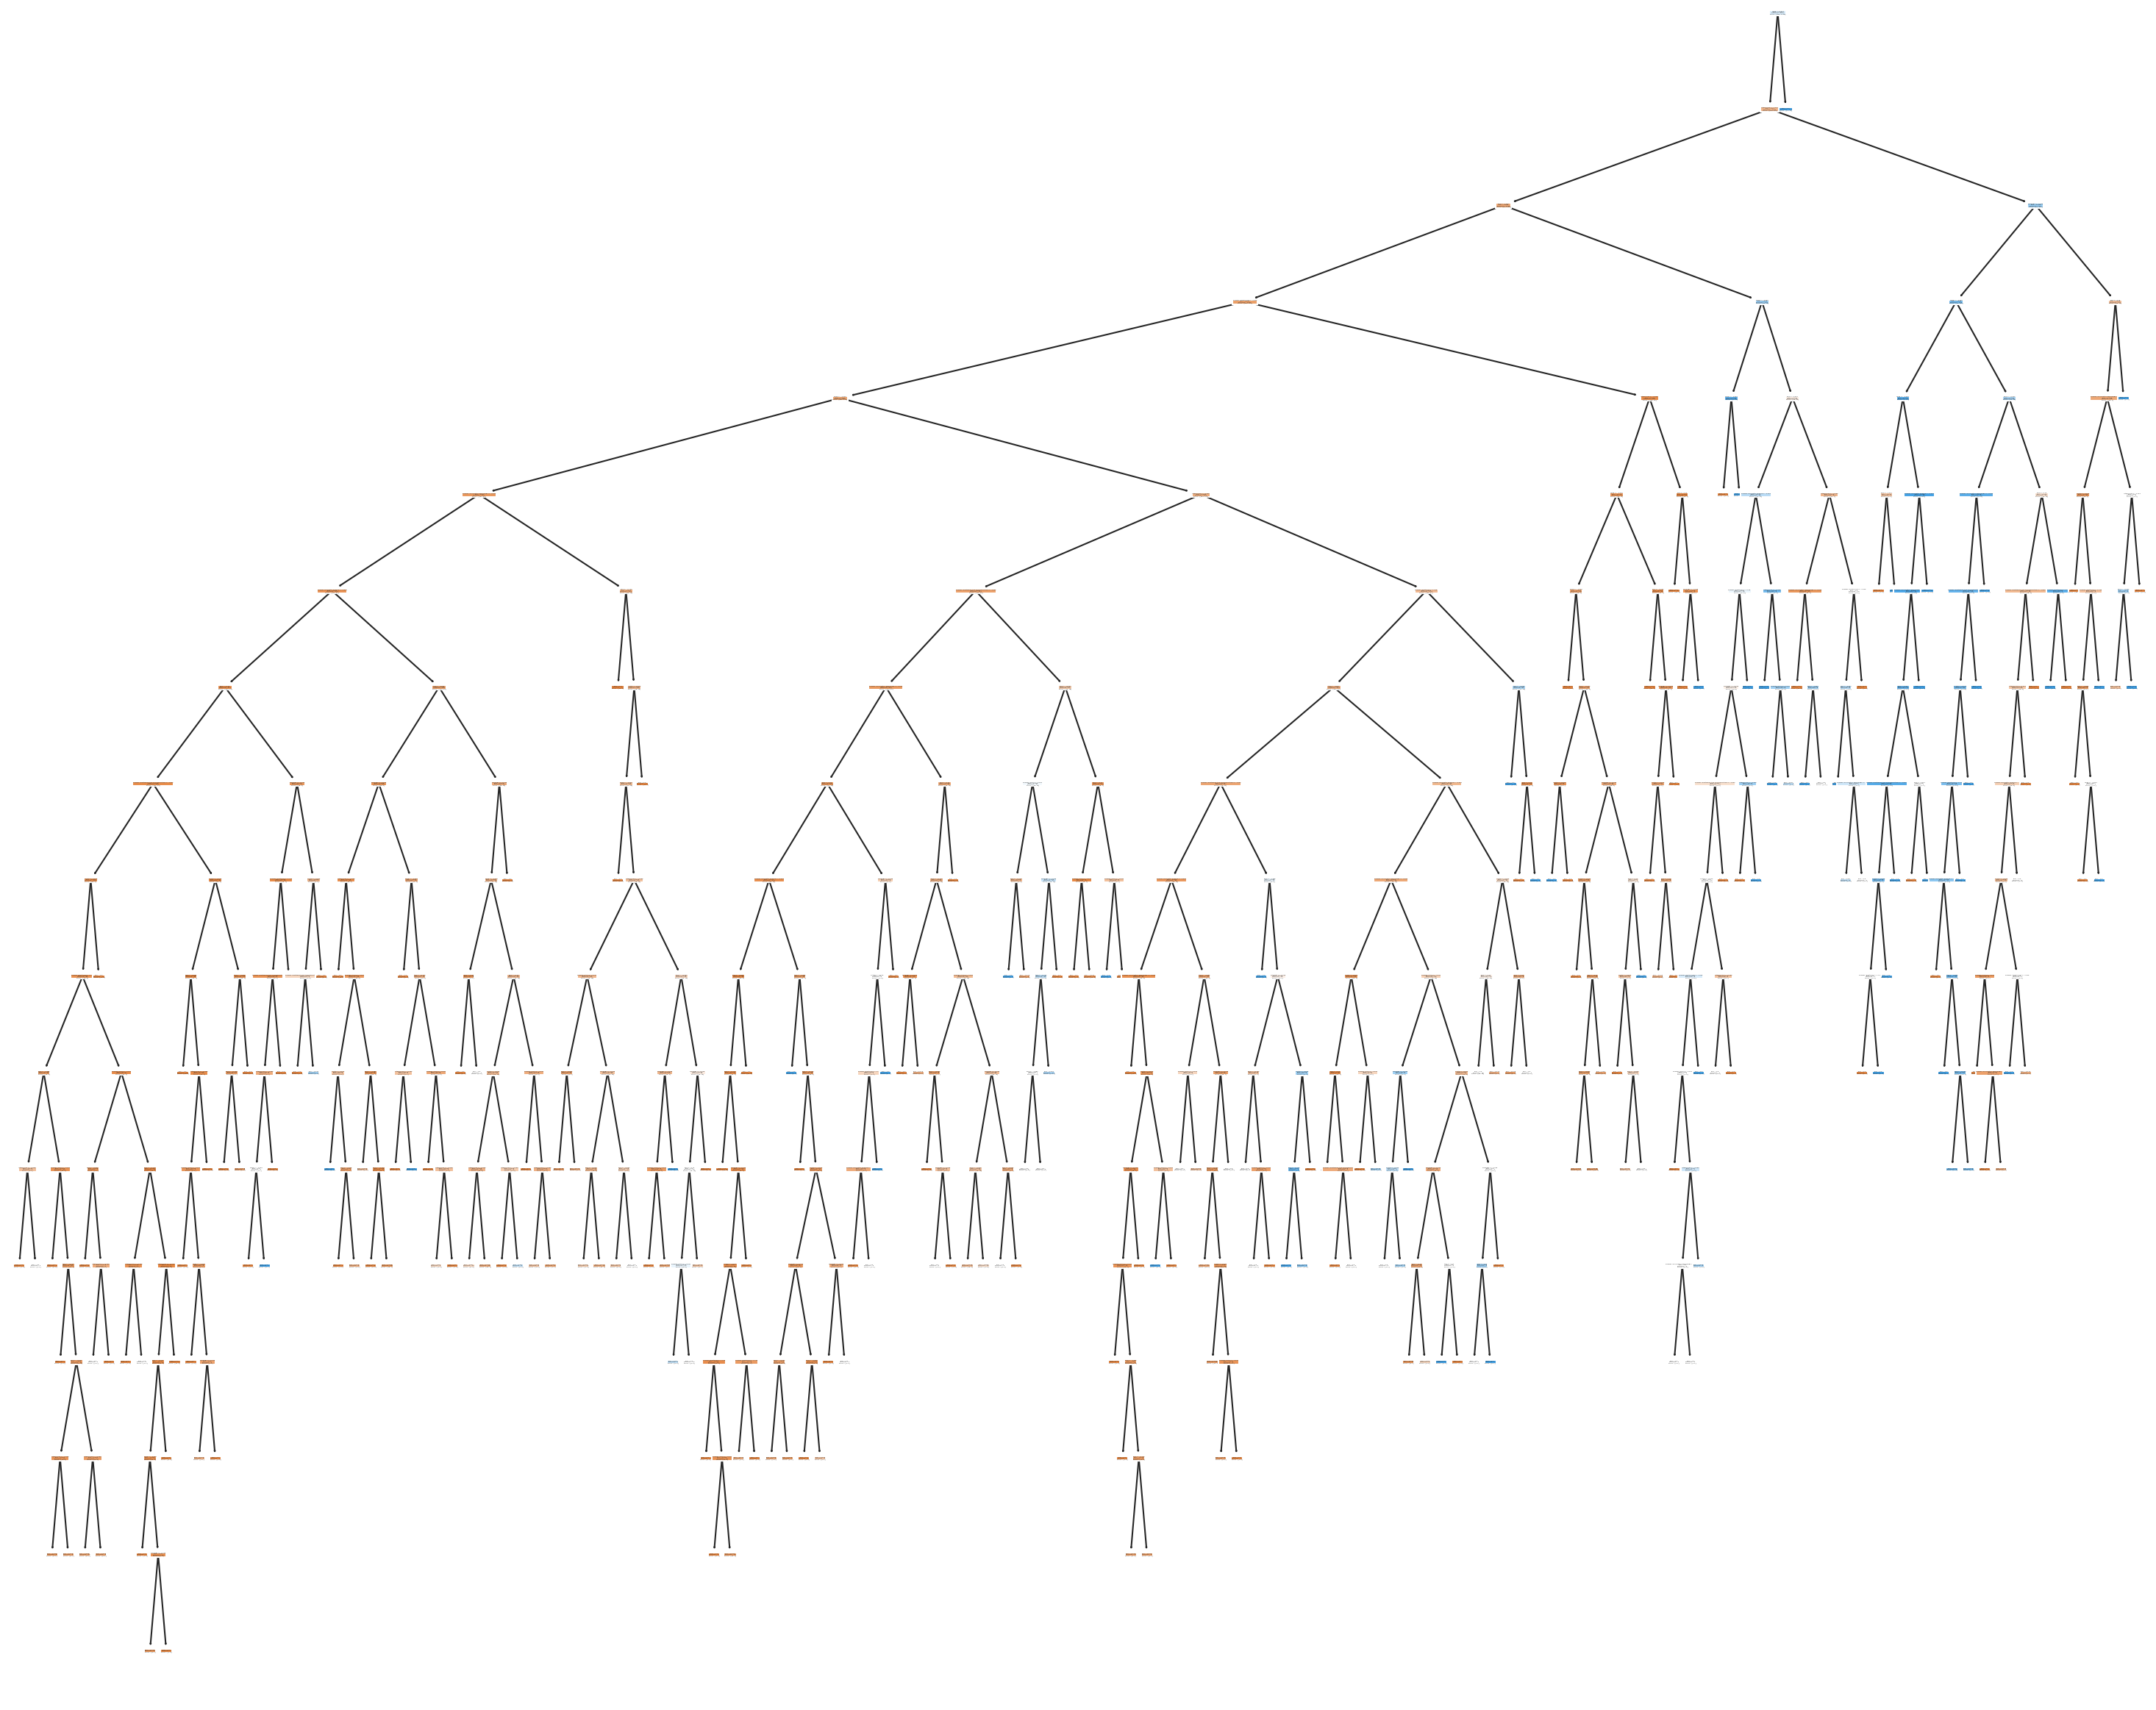

In [ ]:
plt.figure(figsize=(12,10),dpi=150)
plot_tree(tree_model,feature_names=X.columns,filled=True);

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(scaled_x_train, y_train)

# making predictions on the testing set
gnb_pred = gnb.predict(scaled_x_test)

# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, gnb_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 77.07865168539327


79.0224032586558
79.34560327198365
77.07865168539327


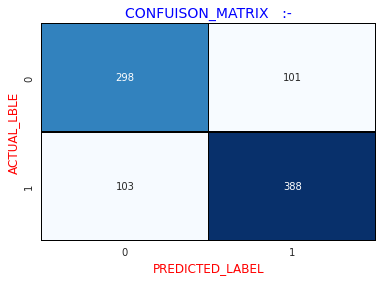

In [ ]:
print(metrics.precision_score(gnb_pred,y_test)*100)
print(metrics.recall_score(gnb_pred,y_test)*100)
print(metrics.accuracy_score(gnb_pred,y_test)*100)
sns.heatmap(metrics.confusion_matrix(y_test,gnb_pred),annot=True,cbar=False
            ,cmap="Blues",fmt="1",linecolor="Black",linewidth=0.3)
plt.xlabel("PREDICTED_LABEL",fontsize=12,color='r')
plt.ylabel("ACTUAL_LBLE",fontsize=12,color='r')
plt.title("CONFUISON_MATRIX   :-",fontsize=14,color="b")
plt.show()

KNN: 0.823716 (0.021135)
CART: 0.874285 (0.020472)
LR: 0.766365 (0.020243)
SVM: 0.863227 (0.019348)
GNB: 0.796730 (0.031433)


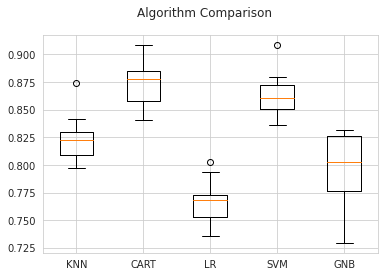

In [ ]:
# Compare Algorithms
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('LR', LogisticRegression()))
models.append(('SVM', SVC()))
models.append(('GNB', GaussianNB()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed,shuffle=True)
	cv_results = model_selection.cross_val_score(model, scaled_x_train, y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()